Etudiante : Marwa El Kamil

**Reconnaissance Faciale des Joueurs Marocains de Football - SVM et LBP**

**Description :**

Ce notebook est dédié à la mise en œuvre d'un système de reconnaissance faciale pour identifier les joueurs marocains de football. Nous utilisons deux techniques clés : les Machines à Vecteurs de Support (SVM) pour la classification et le Local Binary Patterns (LBP) pour l'extraction des caractéristiques. 

**Contenu :**

1. **Introduction et Objectifs** : Présentation du projet, des techniques utilisées (SVM et LBP), et de l'importance de la reconnaissance faciale dans le domaine sportif.

2. **Collecte et Préparation des Données** : Description de la méthode de collecte des images des joueurs, leur prétraitement, et leur organisation pour l'entraînement.

3. **Extraction des Caractéristiques avec LBP** : Explication du Local Binary Patterns, une méthode puissante pour l'extraction des caractéristiques faciales, suivi de sa mise en œuvre pour préparer les données pour le modèle SVM.

4. **Modélisation avec SVM** : Construction et entraînement du modèle de Machine à Vecteurs de Support. Description des paramètres du modèle, de la validation croisée, et des méthodes d'optimisation utilisées.

5. **Évaluation et Résultats** : Méthodologie pour tester le modèle sur un ensemble de données de test, présentation des résultats obtenus, et comparaison avec d'autres méthodes de reconnaissance faciale si pertinent.

6. **Conclusion et Perspectives** : Synthèse des résultats, discussion sur les limites de l'approche actuelle, et suggestions pour des travaux futurs.

**Technologies Utilisées** : Python, OpenCV pour le traitement d'image, scikit-learn pour l'implémentation du SVM, et autres bibliothèques utiles.

**Résultats Attendus** : Le but est de développer un modèle capable d'identifier avec précision les joueurs marocains de football à partir de leurs images, en exploitant les puissances combinées des SVM et LBP.


### Import des librairies et packages:

In [62]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from imutils import paths
from pathlib import Path
import numpy as np
import imutils
import cv2
import os

In [63]:
def loadNewBD(inputPath):
    # Récupération des chemins de toutes les images dans le répertoire donné
    imagePaths = list(paths.list_images(inputPath))
   
    # Initialisation de listes pour stocker les visages et les étiquettes (labels)
    faces = list()
    labels = list()
 
    # Parcourir chaque chemin d'image
    for imagePath in imagePaths:
        # Lire l'image et récupérer le label (étiquette) de l'image
        # Le label est généralement dérivé du nom de fichier
        image = cv2.imread(imagePath) # Lire l'image à l'aide de OpenCV
        name = Path(imagePath).stem   # Extraire le nom de fichier sans extension comme label

        # Ajouter l'image et son label respectif aux listes
        faces.append(image) # Ajouter l'image à la liste des visages
        labels.append(name) # Ajouter le label à la liste des labels

    # Convertir les listes de visages et de labels en tableaux NumPy pour un traitement ultérieur
    faces = np.array(faces)
    labels = np.array(labels)

    # Retourner le tuple contenant les visages et les labels
    return (faces, labels)

cette fonction "loadNewBD" qui prend un chemin vers un dossier contenant des images. Il lit chaque image, extrait son nom comme label, et stocke les images et leurs labels respectifs dans des listes, qui sont ensuite converties en tableaux NumPy avant d'être retournées. Cette fonction est utile pour charger des données d'image pour des tâches de reconnaissance ou de traitement d'image.

In [64]:
(visages, names) = loadNewBD("data_players")

In [65]:
names

array(['Walid Reguragui_215', 'Anass Zeroury_127', 'Anass Zeroury_133',
       'saiss_193', 'saiss_187', 'boukhlal_153', 'boukhlal_147',
       'boukhlal_146', 'boukhlal_152', 'saiss_186', 'saiss_192',
       'Anass Zeroury_132', 'Anass Zeroury_126', 'Walid Reguragui_214',
       'Walid Reguragui_216', 'Anass Zeroury_130', 'Anass Zeroury_124',
       'Anass Zeroury_118', 'saiss_184', 'saiss_190', 'aguerd_109',
       'boukhlal_144', 'boukhlal_150', 'boukhlal_151', 'boukhlal_145',
       'aguerd_108', 'saiss_191', 'saiss_185', 'Anass Zeroury_119',
       'Anass Zeroury_125', 'Anass Zeroury_131', 'Walid Reguragui_217',
       'Walid Reguragui_207', 'Walid Reguragui_213', 'Anass Zeroury_135',
       'Anass Zeroury_121', 'saiss_195', 'boukhlal_141', 'boukhlal_155',
       'boukhlal_154', 'boukhlal_140', 'saiss_194', 'Anass Zeroury_120',
       'Anass Zeroury_134', 'Walid Reguragui_212', 'Walid Reguragui_206',
       'Walid Reguragui_210', 'Anass Zeroury_122', 'Anass Zeroury_136',
       's

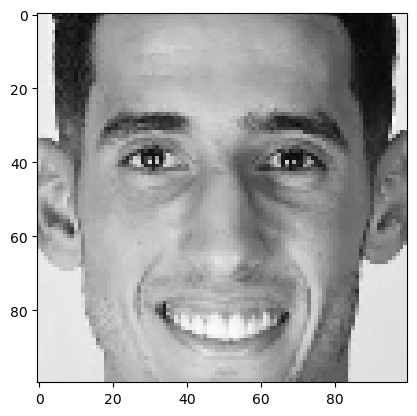

In [66]:
 plt.imshow(visages[20], cmap = 'gray')

In [67]:
def extractingLabels(names):
    # Initialisation d'une liste vide pour les labels
    labels = []

    # Parcourir chaque nom dans la liste des noms
    for name in names:
        # Extraire le label en retirant les trois derniers caractères
        # et ajouter ce label à la liste des labels
        labels.append(name[:len(name)-3])

    # Convertir la liste des labels en un tableau NumPy
    labels = np.array(labels)

    # Retourner le tableau des labels
    return labels


La fonction extractingLabels prend en entrée une liste de noms et extrait des étiquettes (labels) en retirant les trois derniers caractères de chaque nom.

In [68]:
Labels = extractingLabels(names)
Labels

array(['Walid Reguragui_', 'Anass Zeroury_', 'Anass Zeroury_', 'saiss_',
       'saiss_', 'boukhlal_', 'boukhlal_', 'boukhlal_', 'boukhlal_',
       'saiss_', 'saiss_', 'Anass Zeroury_', 'Anass Zeroury_',
       'Walid Reguragui_', 'Walid Reguragui_', 'Anass Zeroury_',
       'Anass Zeroury_', 'Anass Zeroury_', 'saiss_', 'saiss_', 'aguerd_',
       'boukhlal_', 'boukhlal_', 'boukhlal_', 'boukhlal_', 'aguerd_',
       'saiss_', 'saiss_', 'Anass Zeroury_', 'Anass Zeroury_',
       'Anass Zeroury_', 'Walid Reguragui_', 'Walid Reguragui_',
       'Walid Reguragui_', 'Anass Zeroury_', 'Anass Zeroury_', 'saiss_',
       'boukhlal_', 'boukhlal_', 'boukhlal_', 'boukhlal_', 'saiss_',
       'Anass Zeroury_', 'Anass Zeroury_', 'Walid Reguragui_',
       'Walid Reguragui_', 'Walid Reguragui_', 'Anass Zeroury_',
       'Anass Zeroury_', 'saiss_', 'boukhlal_', 'boukhlal_', 'boukhlal_',
       'saiss_', 'Anass Zeroury_', 'Walid Reguragui_', 'YassineBono_',
       'photo hakimi_', 'photo hakimi_', 'p

In [69]:
from sklearn.preprocessing import LabelEncoder

def encode(labels):
    # Créer une instance de LabelEncoder
    le = LabelEncoder()

    # Ajuster le LabelEncoder aux étiquettes fournies et les transformer
    # Cela convertit les étiquettes en valeurs numériques
    labels = le.fit_transform(labels)

    # Retourner les étiquettes transformées
    return labels


LabelEncoder : Cette classe de scikit-learn est utilisée pour transformer des étiquettes non numériques (comme des noms de catégories) en valeurs numériques. Ceci est souvent nécessaire dans le traitement de données, car de nombreux algorithmes de machine learning préfèrent travailler avec des données numériques.
fit_transform() : Cette méthode ajuste le modèle LabelEncoder aux données fournies et, en même temps, transforme les étiquettes en valeurs numériques. Chaque classe unique se voit attribuer un entier unique.

In [70]:
labels = encode(Labels)
labels

array([1, 0, 0, 6, 6, 4, 4, 4, 4, 6, 6, 0, 0, 1, 1, 0, 0, 0, 6, 6, 3, 4,
       4, 4, 4, 3, 6, 6, 0, 0, 0, 1, 1, 1, 0, 0, 6, 4, 4, 4, 4, 6, 0, 0,
       1, 1, 1, 0, 0, 6, 4, 4, 4, 6, 0, 1, 2, 5, 5, 5, 5, 2, 2, 2, 5, 5,
       5, 2, 2, 4, 2, 2, 5, 5, 2, 5, 5, 4, 4, 5, 5, 2, 5, 5, 5, 5, 5, 5,
       5, 5, 2, 5, 5, 5, 5, 5, 5, 2, 1, 1, 3, 3, 1, 1, 6, 6, 3, 3, 3, 6,
       1, 6, 6, 1, 0, 6, 3, 3, 4, 3, 3, 6, 0, 0, 6, 6, 1, 1, 0, 3, 3, 3,
       3, 0, 1, 6])

In [71]:
from skimage import feature
import cv2

def LBP(face):
    # Convertir l'image de visage en niveaux de gris
    # car LBP travaille généralement sur des images en niveaux de gris
    face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

    # Appliquer le Local Binary Pattern à l'image
    # Le paramètre 16 indique le nombre de points de voisinage
    # Le paramètre 2 représente le rayon du LBP
    lbp = feature.local_binary_pattern(face, 16, 2)

    # Retourner l'image transformée par LBP
    return lbp


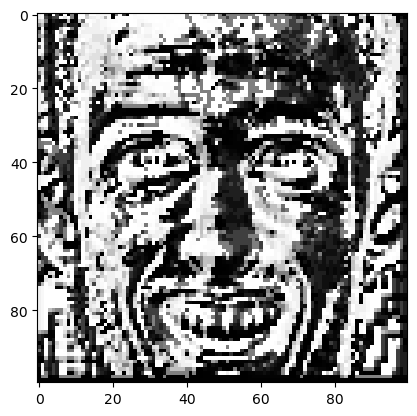

In [72]:
im = LBP(visages[20])
plt.imshow(im, cmap = 'gray')

In [73]:
def extractLBPBD(faces):
    # Initialiser une liste pour stocker les caractéristiques LBP des visages
    facesLBP = []

    # Parcourir chaque visage dans la liste fournie
    for i in range(len(faces)):
        # Appliquer la fonction LBP sur le visage actuel
        lbp = LBP(faces[i])

        # Ajouter les caractéristiques LBP du visage à la liste
        facesLBP.append(lbp)

    # Convertir la liste des caractéristiques LBP en un tableau NumPy
    facesLBP = np.array(facesLBP)

    # Retourner le tableau des caractéristiques LBP
    return facesLBP


La fonction "extractLBPBD" prend une liste d'images de visages (faces) et applique la fonction LBP à chacune d'elles pour extraire leurs caractéristiques en utilisant le Local Binary Pattern (LBP). Ensuite, elle retourne un tableau NumPy contenant toutes les images de visages transformées par LBP

In [74]:
faces = extractLBPBD(visages)

In [75]:
from sklearn.model_selection import train_test_split

def split(faces, labels):
    # Diviser l'ensemble des données et des labels en sous-ensembles d'entraînement et de test
    # Le paramètre test_size=0.20 indique que 20% des données seront utilisées pour le test
    # shuffle=True assure que les données sont mélangées avant la séparation
    # stratify=labels assure que la distribution des labels est similaire dans les sous-ensembles d'entraînement et de test
    x_train, x_test, y_train, y_test = train_test_split(faces, labels, test_size=0.20, shuffle=True, stratify=labels)

    # Retourner les sous-ensembles d'entraînement et de test
    return x_train, x_test, y_train, y_test


In [76]:
x_train , x_test , y_train , y_test = split(faces,labels)

In [77]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(108, 100, 100)
(28, 100, 100)
(108,)
(28,)


In [78]:
x_train = x_train /255
x_test = x_test/ 255

In [79]:
nsamples, nx, ny = x_train.shape
x_train = x_train.reshape((nsamples,nx*ny))


In [80]:
nsamples2, nx2, ny2 = x_test.shape
x_test = x_test.reshape((nsamples2,nx2*ny2))

In [81]:
from sklearn.svm import LinearSVC

# Création d'une instance de LinearSVC
# C=50.0 définit la force de la régularisation
# random_state=42 est utilisé pour la reproductibilité des résultats
model = LinearSVC(C=50.0, random_state=42)

# Entraînement du modèle SVM avec les données d'entraînement
# x_train contient les caractéristiques (features) et y_train les labels associés
model.fit(x_train, y_train)


/Users/marwa/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(C=50.0, random_state=42)

In [82]:
prediction = model.predict(x_test)

In [83]:
result = print(prediction)

[4 5 1 5 3 6 5 6 4 5 4 4 5 6 1 5 6 4 5 0 3 3 3 1 0 5 0 4]


In [84]:
model.score(x_test, y_test)

0.6071428571428571

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn import svm
faces = faces/255
nsamples3, nx3, ny3 = faces.shape
faces = faces.reshape((nsamples3,nx3*ny3))
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, faces, labels, cv=LeaveOneOut())

In [86]:
scores

array([1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.])

In [87]:
scores.mean()

0.5955882352941176

In [97]:
labels_map = {
    0: 'Zaroury',
    1: 'Regueragui',
    2: 'Bono',
    3: 'Aguerd',
    4: 'Boukhlal',
    5: 'Hakimi',
    6: 'Sais'
}
new_img2 = cv2.imread('zaroury.jpeg')

# Resize and normalize the image
new_img2 = LBP(new_img2)
new_img2 = cv2.resize(new_img2, (100, 100))
new_img2 = new_img2 / 255.

# Flatten the image
new_img_flattened = new_img2.reshape(1, 100*100)

# Use the model to predict the label of the new image
predicted_label = model.predict(new_img_flattened)

# Get the label with the highest probability
predicted_label = np.argmax(predicted_label)
original_label = labels_map[predicted_label]
print("The predicted label for new image is:",  original_label)

The predicted label for new image is: Zaroury
